In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

In [3]:
N_shuffle = 14
N_generation = 14
q_vals = [0.1, 0.3, 0.5, 0.7, 0.9]
N_q = len(q_vals)

q_batches = [11, -3, 1.5, 67, -9.8]
q_sgds = np.zeros((N_q,N_shuffle))
for i in range(N_q):
    q_sgds[i] = np.random.normal( q_batches[i], 2, N_shuffle)
q_sgds

array([[  8.27912779,  15.03445579,  10.97191555,   9.81736995,
         11.89490249,  10.21316421,   7.65049448,  13.74375426,
         13.11133912,  13.0451913 ,  11.54883735,  12.36549775,
         14.1381681 ,   5.50604662],
       [ -2.00613149,  -2.80486099,  -3.22698862,  -2.42434892,
         -3.54711871,  -4.05756259,  -3.35731053,  -4.02976664,
          0.50115583,  -1.80434041,   0.68921898,  -1.15518427,
         -1.02208392,  -5.42631522],
       [  0.8661769 ,   0.43444645,   1.47036311,   3.59286938,
         -0.93743074,   2.02269344,   1.95825022,   2.56623956,
          2.47339178,   0.9395482 ,  -0.39273326,  -1.45232489,
          3.71431129,  -3.19281105],
       [ 63.7675282 ,  68.57303328,  65.86172957,  67.36925552,
         64.10911534,  68.68388228,  65.26465413,  66.25071174,
         66.45605958,  64.31957381,  67.1347918 ,  69.33799596,
         67.63183582,  65.7543916 ],
       [ -8.90812617,  -7.89743171, -12.98630662,  -9.42891069,
         -7.50085069

In [4]:
c_Norm = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=c_Norm, cmap=plt.get_cmap('cool'))
styles = ['-', '--']
names = ['-q batch', '-q sgd']

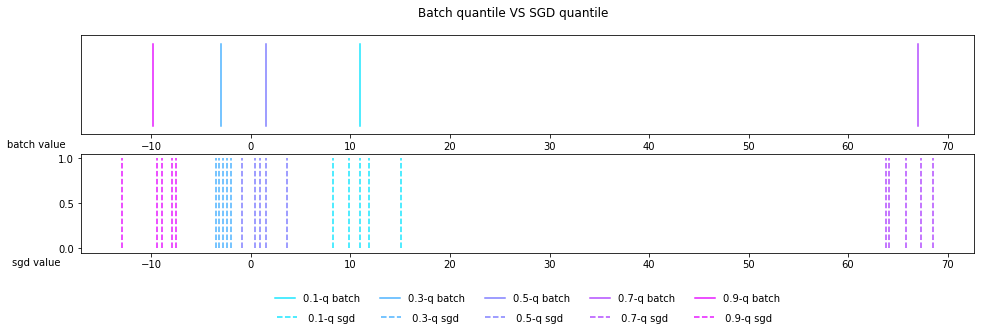

In [5]:
def plot_quantiles(q_vals, q_batches, q_sgds):

    fig = plt.figure(figsize=(16,4))
    ax_batch = fig.add_subplot(211)
    ax_sgd = fig.add_subplot(212, sharex = ax_batch)
    fig.suptitle('Batch quantile VS SGD quantile')
    
    for idx in range(N_q):
        colorVal = scalarMap.to_rgba(q_vals[idx])
        qb = q_batches[idx]

        ax_batch.plot([qb,qb], [0,1], styles[0], label= str(q_vals[idx])+names[0], color=colorVal)

        for i in range(q_sgds.shape[0]):
            qs = q_sgds[idx][i]
            if (i==0): 
                ax_sgd.plot([qs,qs], [0,1], styles[1], label=' '+str(+q_vals[idx])+names[1]+'  ', color=colorVal)
            else: 
                ax_sgd.plot([qs,qs], [0,1], styles[1], color=colorVal)

    #set
    ax_batch.set_xlabel('batch value')
    ax_batch.xaxis.set_label_coords(-0.05, -0.05)
    ax_batch.set_ylim([-0.1,1.1])
    ax_batch.set_yticks([])

    plt.locator_params(axis='x', nbins=10)

    ax_sgd.set_xlabel('sgd value')
    ax_sgd.xaxis.set_label_coords(-0.05, -0.05)

    # set position of legend
    ax_batch.legend(loc='lower center', bbox_to_anchor=(0.5, -1.8),
            frameon=False, ncol=len(q_vals))
    ax_sgd.legend(loc='lower center', bbox_to_anchor=(0.5, -0.8),
        frameon=False, ncol=len(q_vals))
        
    return fig
                    
fig = plot_quantiles(q_vals, q_batches, q_sgds)


In [6]:
def generate_mtx():
    mtx = np.zeros((N_q, N_generation, N_shuffle))
    for q_idx in range(N_q):
        # each generation:
        mtx_q = mtx[q_idx]
        for gen_idx in range(N_generation):
            # each shuffle:
            mtx_q[gen_idx] = np.random.normal(q_batches[q_idx], 5, N_shuffle)
    return mtx

q_batches_lst = np.zeros((N_q,N_generation))
for i in range(N_q):
    q_batches_lst[i] = np.random.normal(q_batches[i], 2, N_generation)

q_sgds_lst = generate_mtx()

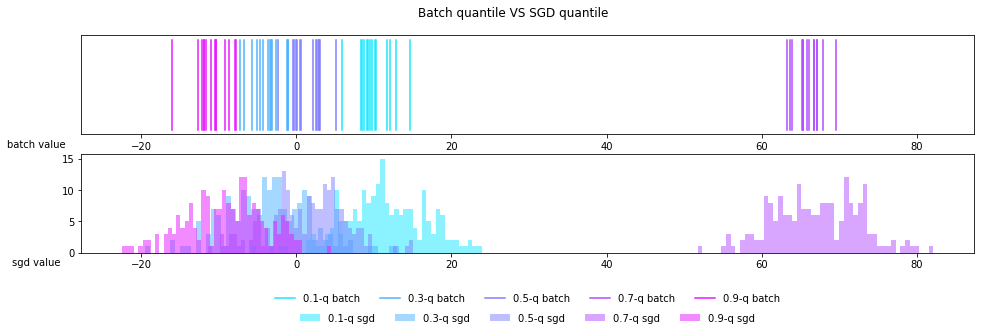

In [7]:
def plot_quantiles(q_vals, q_batches_lst, q_sgds_lst):

    fig = plt.figure(figsize=(16,4))
    ax_batch = fig.add_subplot(211)
    ax_sgd = fig.add_subplot(212, sharex = ax_batch)
    fig.suptitle('Batch quantile VS SGD quantile')
    bins = 50
    
    for q_idx in range(N_q):
        colorVal = scalarMap.to_rgba(q_vals[q_idx])
        for gen_idx in range(N_generation):
            qb = q_batches_lst[q_idx][gen_idx]
            if gen_idx==0:
                ax_batch.plot([qb,qb], [0,1], styles[0], label= str(q_vals[q_idx])+names[0], color=colorVal)
            else:
                ax_batch.plot([qb,qb], [0,1], styles[0], color=colorVal)
        
        mtx_q = q_sgds_lst[q_idx].reshape(-1)
        ax_sgd.hist(mtx_q, bins, alpha=0.5, label = str(q_vals[q_idx])+names[1], color=colorVal)
        

    #set
    ax_batch.set_xlabel('batch value')
    ax_batch.xaxis.set_label_coords(-0.05, -0.05)
#     ax_batch.set_ylim([-0.1,1.1])
    ax_batch.set_yticks([])

    plt.locator_params(axis='x', nbins=10)

    ax_sgd.set_xlabel('sgd value')
    ax_sgd.xaxis.set_label_coords(-0.05, -0.05)

    # set position of legend
    ax_batch.legend(loc='lower center', bbox_to_anchor=(0.5, -1.8),
            frameon=False, ncol=len(q_vals))
    ax_sgd.legend(loc='lower center', bbox_to_anchor=(0.5, -0.8),
        frameon=False, ncol=len(q_vals))
        
    return fig
                    
fig = plot_quantiles(q_vals, q_batches_lst, q_sgds_lst)

In [8]:
# shape: N_q * N_generation * N_shuffle
def generate_mtx():
    mtx = np.zeros((N_q, N_generation, N_shuffle))
    for q_idx in range(N_q):
        # each generation:
        mtx_q = mtx[q_idx]
        for gen_idx in range(N_generation):
            # each shuffle:
            mtx_q[gen_idx] = np.random.normal(q_batches[q_idx], 5, N_shuffle)
    return mtx
        
# for i in range(10):
#     mtx = generate_mtx()
#     print (mtx.mean())

for i in range(10):
    print (generate_mtx()[1].mean())


-2.8815876801847256
-2.6960469107586786
-3.0334664308216706
-3.523174375725083
-2.9682003733678775
-2.8012134224702514
-2.8517525832075155
-2.755141294241832
-3.497001251275902
-2.7234999561715827


In [9]:
a = np.zeros((3,4))
a.reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])